In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import pickle
import gzip
import numpy as np

import random
from random import randint

In [2]:
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    # Método do Gradiente
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} finalizada".format(j))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

    # Algoritmo do Backpropagation    
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # Feedforward
        activation = x

        # Lista para armazenar todas as ativações, camada por camada
        activations = [x] 

        # Lista para armazenar todos os vetores z, camada por camada
        zs = [] 

        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # Backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Aqui, l = 1 significa a última camada de neurônios, l = 2 é a segunda e assim por diante. 
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)


In [3]:
#testando
rede1 = Network([4,2,3])
rede1.weights

[array([[-2.27067934,  0.24600742,  0.25309133,  0.31032033],
        [-1.41098674,  1.09301612,  0.56679762, -0.28497747]]),
 array([[-0.27166406,  0.97635304],
        [-1.16488214,  1.56297069],
        [-0.08747132,  0.18263885]])]

In [4]:
# Função de Ativação Sigmóide
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# Função para retornar as derivadas da função Sigmóide
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [5]:
# Funções de manipulação dos dados
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [6]:
# Separação dos dados: treinamento e teste
training_data, validation_data, test_data = load_data_wrapper()
training_data = list(training_data)

In [7]:
# Criação e treinamento da rede
net = Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9110 / 10000
Epoch 1 : 9261 / 10000
Epoch 2 : 9313 / 10000
Epoch 3 : 9371 / 10000
Epoch 4 : 9396 / 10000
Epoch 5 : 9399 / 10000
Epoch 6 : 9444 / 10000
Epoch 7 : 9447 / 10000
Epoch 8 : 9469 / 10000
Epoch 9 : 9493 / 10000
Epoch 10 : 9493 / 10000
Epoch 11 : 9493 / 10000
Epoch 12 : 9507 / 10000
Epoch 13 : 9480 / 10000
Epoch 14 : 9472 / 10000
Epoch 15 : 9498 / 10000
Epoch 16 : 9463 / 10000
Epoch 17 : 9505 / 10000
Epoch 18 : 9474 / 10000
Epoch 19 : 9506 / 10000
Epoch 20 : 9473 / 10000
Epoch 21 : 9492 / 10000
Epoch 22 : 9503 / 10000
Epoch 23 : 9495 / 10000
Epoch 24 : 9508 / 10000
Epoch 25 : 9503 / 10000
Epoch 26 : 9504 / 10000
Epoch 27 : 9509 / 10000
Epoch 28 : 9502 / 10000
Epoch 29 : 9486 / 10000


In [8]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f , encoding="latin1")
    
valid_x, valid_y = valid_set

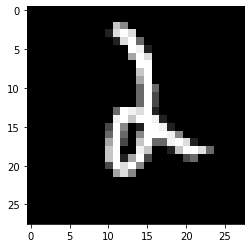

In [11]:
#um teste aleatório
image = valid_x[randint(0,10000)]

plt.imshow(image.reshape((28, 28)), cmap=cm.Greys_r)
plt.show()

In [12]:
#resultado
layer1 = sigmoid(np.dot(net.weights[0], image))
layer2 = sigmoid(np.dot(net.weights[1], layer1))

for i in range(0,10):
    print("Probabilidade de ser {} = {}%".format(i,round((layer2[i]*100)/sum(layer2),2)))

Probabilidade de ser 0 = 0.0%
Probabilidade de ser 1 = 11.2%
Probabilidade de ser 2 = 85.33%
Probabilidade de ser 3 = 0.0%
Probabilidade de ser 4 = 0.1%
Probabilidade de ser 5 = 0.0%
Probabilidade de ser 6 = 3.37%
Probabilidade de ser 7 = 0.0%
Probabilidade de ser 8 = 0.0%
Probabilidade de ser 9 = 0.0%
